In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import functions as fct
import pairing_poisson_N as pair
#reload(fct)
reload(pair)
%matplotlib inline

In [38]:
#number of stimulated neurons
Ntot=1
Nstim=1
#time constants
taul=0.01
taus=0.003
fac=(1./((taul-taus)))
inteps=fac*(taul-taus)
intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
print(intepsquad)
dt=0.0005



# different input rates
low_rate=3.
medium_rate=5.
high_rate=10.
epsilon=0.001

#rate of post synaptic stimulation
post_rate=20.

#different weights (all excitatory)
low_weight=0.01
medium_weight=0.12
high_weight=0.5


#learning rate
lr=0.001

38.4615384615


In [39]:
parameter={
    "Ntot":Ntot,
    "Nstim":Nstim,
    "taul":taul,
    "taus":taus,
    "dt":dt,
    "kernel":pair.eps,
    "intepsquad":intepsquad,
    "inteps":inteps,
    "rate":low_rate,
    "epsilon":epsilon,
    "lr":lr,
    "rho":pair.sigmoidal,
    "rhoprime":pair.sigmoidalp,
    "threshold":15.,
    "slope":0.3,
    "maxfire":100.,
    "post_rate":post_rate,
    "g1":pair.g1,
    "g2":pair.g2,
    "f":pair.fsigmoid,
    "init":pair.init,
    "pre_learning_time":1.,
    "learning_time":10.,
    "interval_length":0.01,
    "total_time":11.1,
    "alpha":1.,
    "learning_rule":pair.ngradient,
    "percentage":1, #0 for absolute weight change plot, 1 for relative
    "label":("high EPSP variance","medium EPSP variance","small EPSP variance"),
    "ylimits":[98.3,101.7],
    "ofile":"2018_06-07_pairing_different_rates_Poisson.svg"
    }

Pairing protocol for Nstim synapses excitatory pre/post pairing at different rates and different weights.

In [40]:
parameter["rate"]=low_rate
parameter["inteps"]=1./parameter["rate"]*inteps
print(parameter["inteps"])
parameter["intepsquad"]=1./(parameter["rate"]**2)*intepsquad
weight={"unstim":low_weight*np.ones((Ntot-Nstim,)),"stim":low_weight*np.ones((Nstim,))}

0.333333333333


In [41]:
lweights=np.mean(pair.nlearning(weight,**parameter)["weight"]["stim"],axis=1)

In [42]:
parameter["rate"]=medium_rate
parameter["inteps"]=1./parameter["rate"]*inteps
parameter["intepsquad"]=1./(parameter["rate"]**2)*intepsquad
weight={"unstim":low_weight*np.ones((Ntot-Nstim,)),"stim":low_weight*np.ones((Nstim,))}

In [43]:
mweights=np.mean(pair.nlearning(weight,**parameter)["weight"]["stim"],axis=1)

In [44]:
parameter["rate"]=high_rate
parameter["inteps"]=1./parameter["rate"]*inteps
parameter["intepsquad"]=1./(parameter["rate"]**2)*intepsquad
weight={"unstim":low_weight*np.ones((Ntot-Nstim,)),"stim":low_weight*np.ones((Nstim,))}

In [45]:
hweights=np.mean(pair.nlearning(weight,**parameter)["weight"]["stim"],axis=1)

In [46]:
weights=np.array((lweights,mweights,hweights))


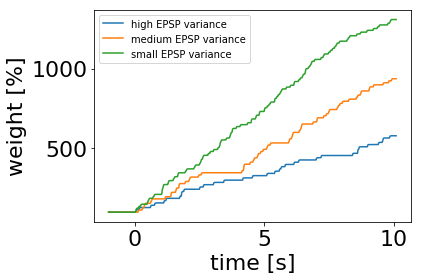

In [47]:
pair.plotLTP(weights,**parameter)

In [48]:
parameter["ofile"]="2018-09-05_poisson_pairingN_LTD_lw.svg"
parameter["rate"]=medium_rate